In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler,OrdinalEncoder
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

In [3]:
# 1. Reading data from CSV
def read_csv(file_path):
    return pd.read_csv(file_path)
#2. Getting information and statistics about over dataset
def dataset_info_statistics(data):
    print("Dataset Information:")
    print(data.info())
    print("\n")

    # Display basic statistics for numerical columns
    print("Basic Statistics for Numerical Columns:")
    print(data.describe())
    print("\n")

#3.check for the null values in the dataset
def check_null(data):
    null_counts = data.isnull().sum()
    print("Null Values in the Dataset:")
    return null_counts

#4.check for duplicated rows in the dataset
def check_duplicates(data):
    
    return data.duplicated().any()

#5. Seperate feature and target
def seperate_features_target(data,target_column):
    X = data.drop(columns=[target_column],axis=1)
    y = data[target_column]
    
    return X,y
#6. Train test split
def perform_train_test_split(X, y, test_size=0.20, random_state=42):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

    return X_train, X_test, y_train, y_test

In [7]:
calories = read_csv('calories.csv')
exercise = read_csv('exercise.csv')

In [9]:
data = pd.merge(calories, exercise, on='User_ID')

In [11]:
data.head()

,User_ID,Calories,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,231.0,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,66.0,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,26.0,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,71.0,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,35.0,female,27,154.0,58.0,10.0,81.0,39.8


In [13]:
dataset_info_statistics(data)

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Calories    15000 non-null  float64
 2   Gender      15000 non-null  object 
 3   Age         15000 non-null  int64  
 4   Height      15000 non-null  float64
 5   Weight      15000 non-null  float64
 6   Duration    15000 non-null  float64
 7   Heart_Rate  15000 non-null  float64
 8   Body_Temp   15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB
None


Basic Statistics for Numerical Columns:
            User_ID      Calories           Age        Height        Weight  \
count  1.500000e+04  15000.000000  15000.000000  15000.000000  15000.000000   
mean   1.497736e+07     89.539533     42.789800    174.465133     74.966867   
std    2.872851e+06     62.456978     16.980264     14.258114     15.03565

In [15]:
check_null(data)

Null Values in the Dataset:


User_ID       0
Calories      0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
dtype: int64

In [17]:
check_duplicates(data)

False

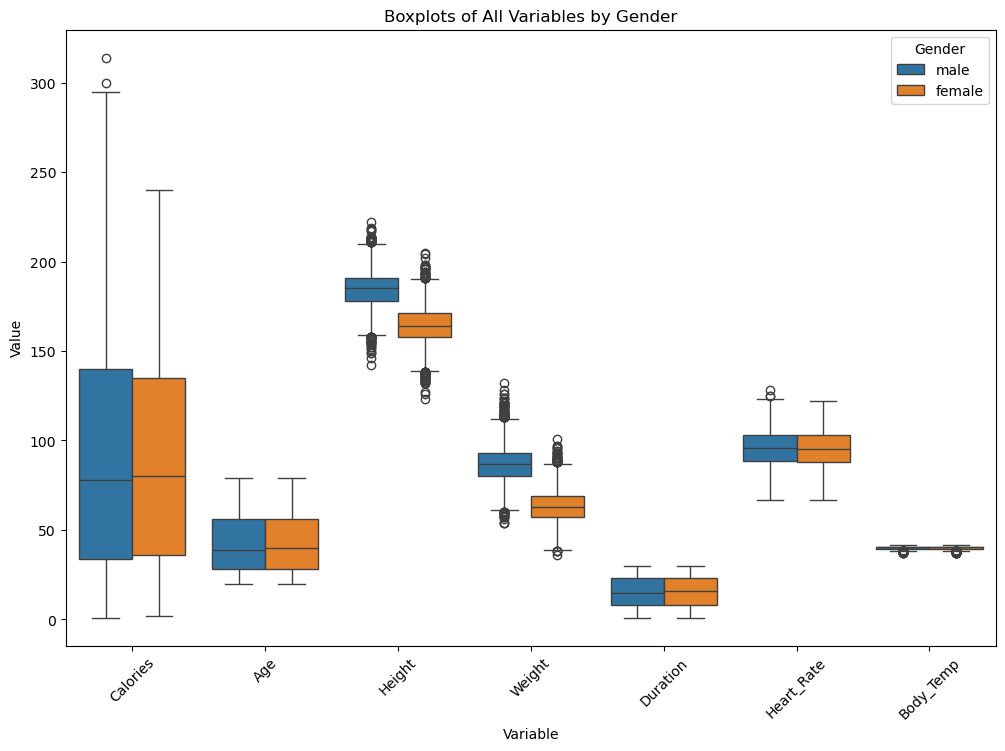

In [19]:
data_melted = data.melt(id_vars='Gender', value_vars=['Calories', 'Age', 'Height', 'Weight', 'Duration', 'Heart_Rate', 'Body_Temp'], 
                        var_name='Variable', value_name='Value')
plt.figure(figsize=(12, 8))
sns.boxplot(x='Variable', y='Value', hue='Gender', data=data_melted)
plt.title('Boxplots of All Variables by Gender')
plt.ylabel('Value')
plt.xlabel('Variable')
plt.xticks(rotation=45)
plt.legend(title='Gender')
plt.show()

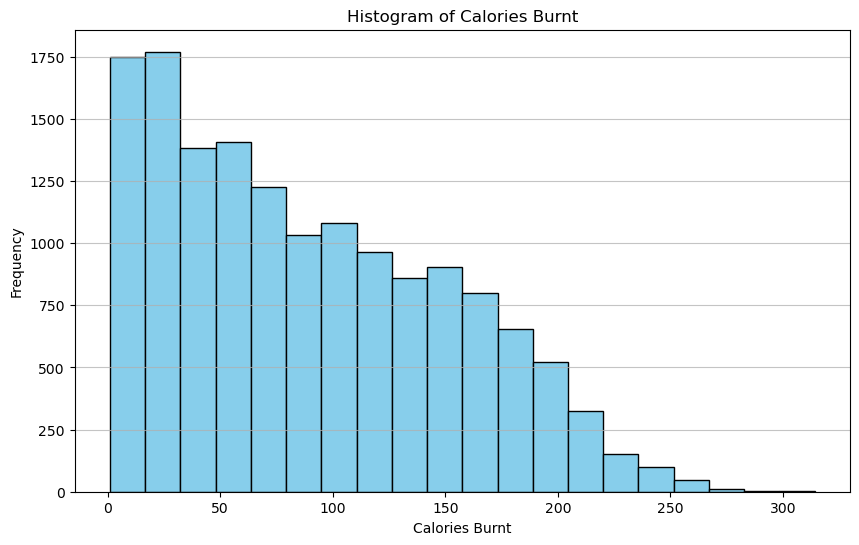

In [21]:
plt.figure(figsize=(10, 6))
plt.hist(data['Calories'], bins=20, color='skyblue', edgecolor='black')  # Replace 'Calories' with the actual column name
plt.title('Histogram of Calories Burnt')
plt.xlabel('Calories Burnt')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

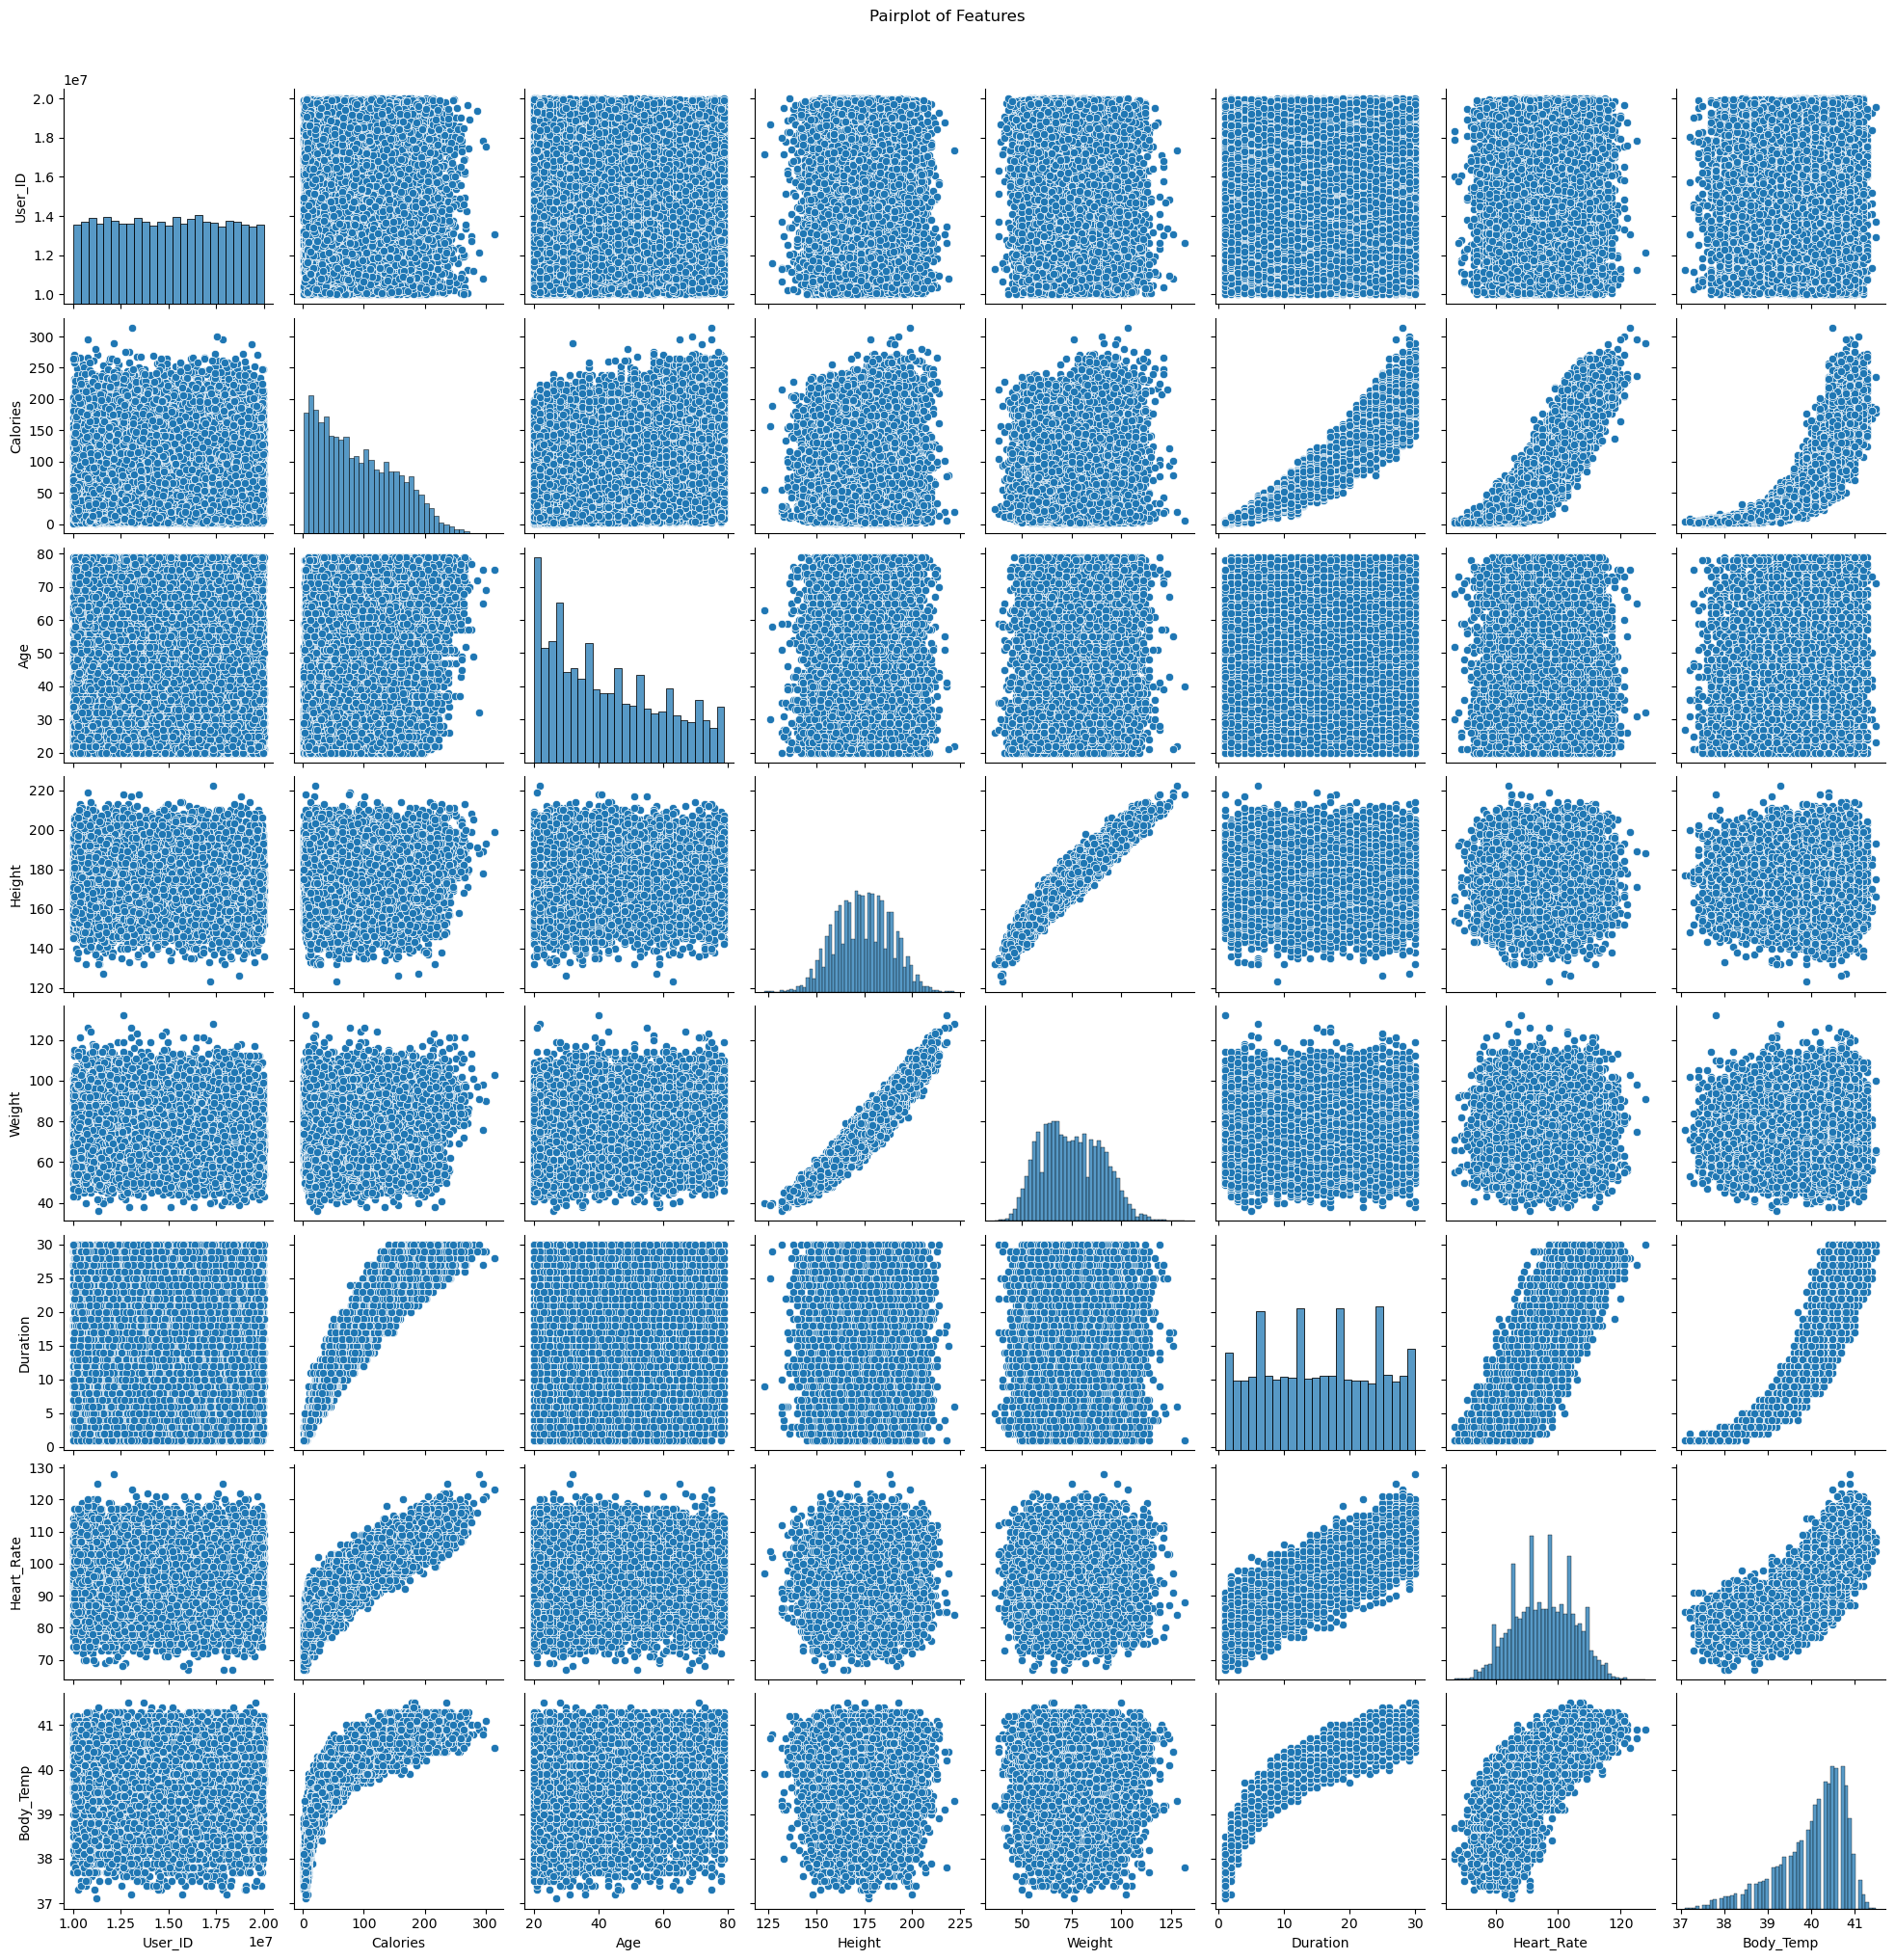

In [101]:
sns.pairplot(data)
plt.suptitle('Pairplot of Features', y=1.02)  # Adjust title position
plt.show()

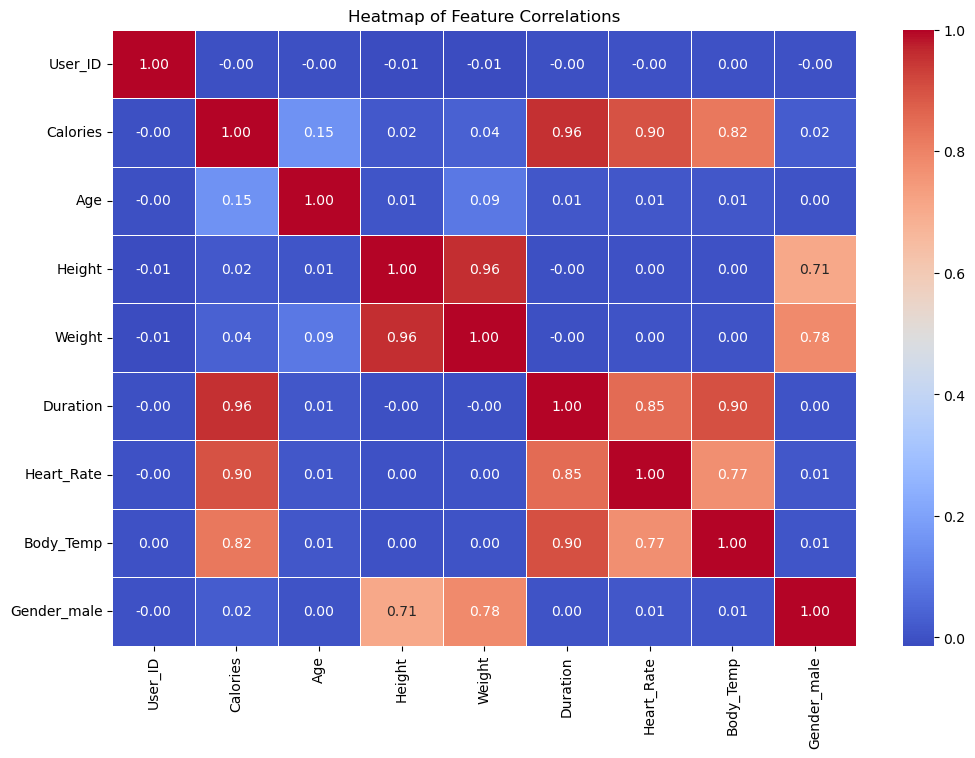

In [105]:
df_encoded = pd.get_dummies(data, drop_first=True)
correlation_matrix = df_encoded.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Heatmap of Feature Correlations')
plt.show()

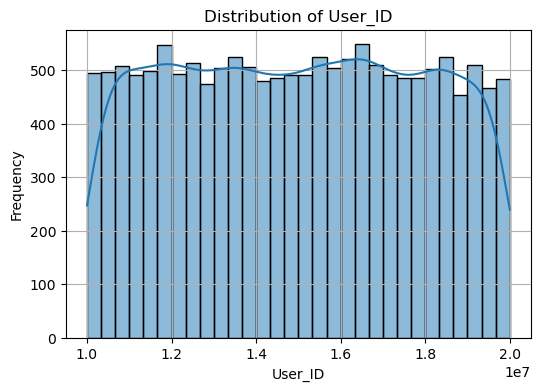

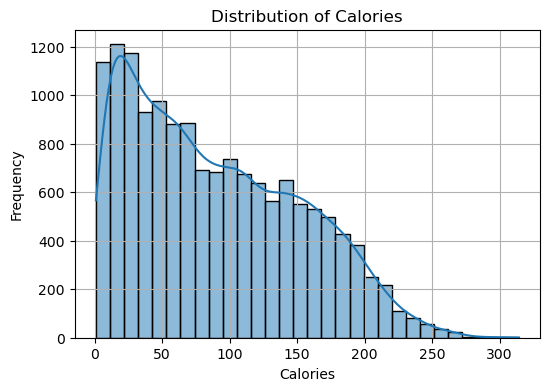

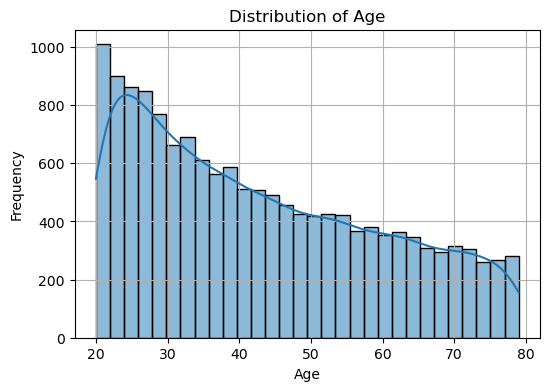

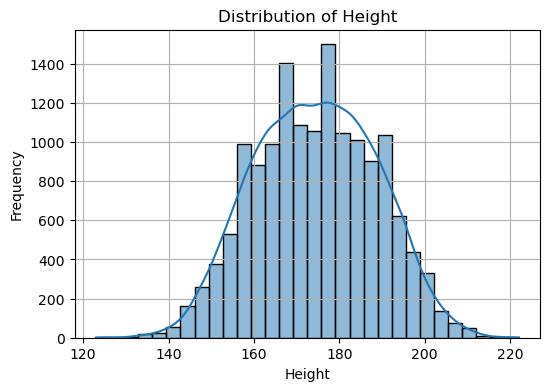

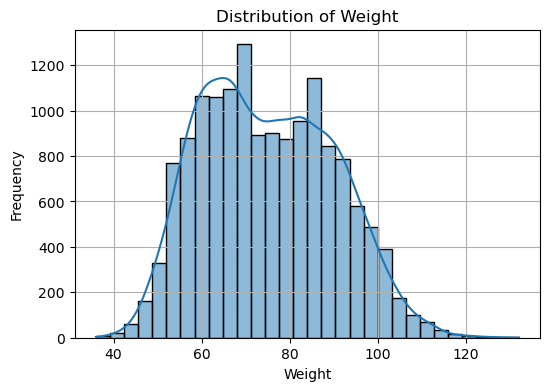

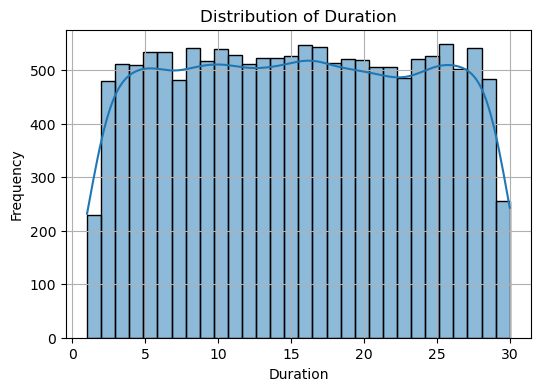

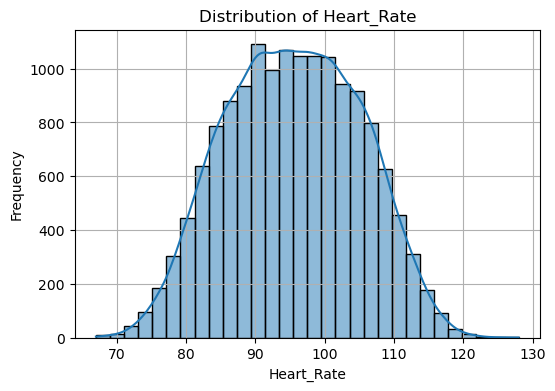

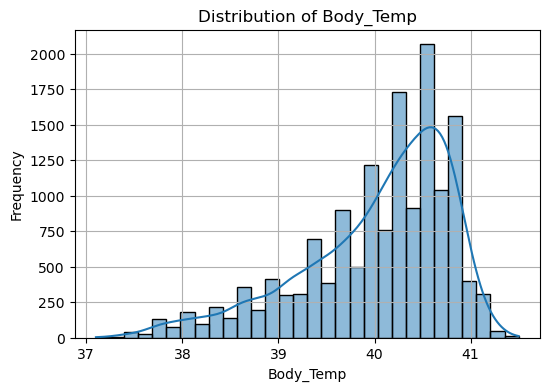

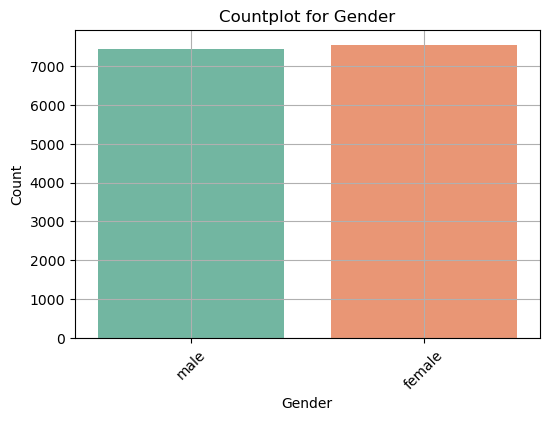

In [130]:
def plot_graph(data):
     # Numerical columns
    numerical_columns = data.select_dtypes(include=np.number).columns
    
    for column in numerical_columns:
        plt.figure(figsize=(6, 4))
        sns.histplot(data[column], kde=True, bins=30)
        plt.title(f"Distribution of {column}")
        plt.xlabel(column)
        plt.ylabel("Frequency")
        plt.grid(True)
        plt.show()
        
    # Categorical columns
    categorical_columns = data.select_dtypes(include='object').columns
    for column in categorical_columns:
        plt.figure(figsize=(6, 4))
        sns.countplot(x=data[column], palette="Set2")
        plt.title(f'Countplot for {column}')
        plt.xlabel(column)
        plt.ylabel('Count')
        plt.xticks(rotation=45)
        plt.grid(True)
        plt.show()

plot_graph(data)

In [23]:
data.columns

Index(['User_ID', 'Calories', 'Gender', 'Age', 'Height', 'Weight', 'Duration',
       'Heart_Rate', 'Body_Temp'],
      dtype='object')

In [25]:
X,y = seperate_features_target(data,'Calories')

In [27]:
X = X.drop(columns=['User_ID'])

In [29]:
X_train,X_test,y_train,y_test = perform_train_test_split(X, y, test_size=0.20, random_state=42)

### Column Transformer and Pipeline

In [31]:
preprocessor = ColumnTransformer(transformers=[
    ('ordinal',OrdinalEncoder(),['Gender']),
    ('num',StandardScaler(),['Age',
                            'Height',
                            'Weight',
                            'Duration',
                            'Heart_Rate',
                            'Body_Temp']),
],remainder='passthrough')

In [33]:
pipeline = Pipeline([("preprocessor",preprocessor),
                     ("model",LinearRegression())
                    ])

In [35]:
from sklearn import set_config

In [31]:
set_config(display='diagram')

In [37]:
pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinal', OrdinalEncoder(),
                                                  ['Gender']),
                                                 ('num', StandardScaler(),
                                                  ['Age', 'Height', 'Weight',
                                                   'Duration', 'Heart_Rate',
                                                   'Body_Temp'])])),
                ('model', LinearRegression())])

In [39]:
pipeline.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinal', OrdinalEncoder(),
                                                  ['Gender']),
                                                 ('num', StandardScaler(),
                                                  ['Age', 'Height', 'Weight',
                                                   'Duration', 'Heart_Rate',
                                                   'Body_Temp'])])),
                ('model', LinearRegression())])

In [41]:
y_pred = pipeline.predict(X_test)

In [43]:
from sklearn.metrics import r2_score

In [45]:
r2_score(y_test,y_pred)

0.9672937151257295

In [47]:
from sklearn.model_selection import KFold

In [49]:
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

In [51]:
from sklearn.model_selection import cross_val_score

In [53]:
cv_results = cross_val_score(pipeline, X, y, cv=kfold, scoring='r2')

In [55]:
cv_results.mean()

0.9671402283675841

In [57]:
from sklearn.metrics import mean_absolute_error

In [59]:
mean_absolute_error(y_test,y_pred)

8.441513553849703

In [61]:
def model_scorer(model_name,model):
    
    output=[]
   
    
    output.append(model_name)
    
    pipeline = Pipeline([
    ('preprocessor',preprocessor),
    ('model',model)])
    
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=42)
    
    pipeline.fit(X_train,y_train)
    
    y_pred = pipeline.predict(X_test)
    
    output.append(r2_score(y_test,y_pred))
    output.append(mean_absolute_error(y_test,y_pred))
    
    kfold = KFold(n_splits=5, shuffle=True, random_state=42)
    cv_results = cross_val_score(pipeline, X, y, cv=kfold, scoring='r2')
    output.append(cv_results.mean())
    
    return output

In [63]:
model_dict={
    'log':LinearRegression(),
    'RF':RandomForestRegressor(),
    'XGBR':XGBRegressor(),
}


In [65]:
model_output=[]
for model_name,model in model_dict.items():
    model_output.append(model_scorer(model_name,model))

In [66]:
model_output

[['log', 0.9672937151257295, 8.441513553849703, 0.9671402283675841],
 ['RF', 0.9981997502247563, 1.7238566666666668, 0.9979073766098226],
 ['XGBR', 0.9988678909361673, 1.4981198125282924, 0.9988510864545181]]

In [65]:
preprocessor = ColumnTransformer(transformers=[
    ('ordinal',OrdinalEncoder(),['Gender']),
    ('num',StandardScaler(),['Age',
                            'Height',
                            'Weight',
                            'Duration',
                            'Heart_Rate',
                            'Body_Temp']),
    
],remainder='passthrough')

In [67]:
pipeline = Pipeline([
    ('preprocessor',preprocessor),
    ('model',XGBRegressor())
    
])

In [69]:
pipeline.fit(X,y)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinal', OrdinalEncoder(),
                                                  ['Gender']),
                                                 ('num', StandardScaler(),
                                                  ['Age', 'Height', 'Weight',
                                                   'Duration', 'Heart_Rate',
                                                   'Body_Temp'])])),
                ('model',
                 XGBRegressor(base_score=None, booster=None, callbacks=None,
                              colsample_bylevel=None, colsample_bynode=None,
                              colsample_bytree=None...
                              feature_types=None, gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=None, n_jobs=None,
                              num_parallel_tree=None, random_state=None, ...))])

In [99]:
sample = pd.DataFrame({
   'Gender':'male',
    'Age':68,
    'Height':190.0,
    'Weight':94.0,
    'Duration':29.0,
    'Heart_Rate':105.0,
    'Body_Temp':40.8,
},index=[0])

In [73]:
pipeline.predict(sample)

array([231.0721], dtype=float32)

### Save The Model

In [68]:
import pickle

In [73]:
with open('pipeline.pkl','wb') as f:
    pickle.dump(pipeline,f)

In [81]:
with open('pipeline.pkl','rb') as f:
    pipeline_saved = pickle.load(f)

In [101]:
result = pipeline_saved.predict(sample)

In [103]:
result 

array([199.26802843])

### GUI

In [105]:
import pickle
import pandas as pd
from tkinter import *
import time
import random  # To randomly choose food items

# Define the food equivalence dictionary
food_equivalents = {
    'slice of pizza': 285,
    'burger': 354,
    'ice cream scoop': 137,
    'fries': 365,
    'soda': 150,
    'chocolate bar': 229,
    'donut': 195,
    'hot dog': 151,
    'chips (small bag)': 160,
    'candy bar': 250,
    'fried chicken': 320,
    'milkshake (medium)': 500,
    'popcorn (buttered, movie size)': 400,
    'mocha coffee': 290,
    'taco': 170,
    'burrito': 290,
    'nachos with cheese': 346,
    'onion rings': 276,
    'cookie': 160,
    'cupcake': 200
}


# Initialize the user_history list to store user data
user_history = []

def show_entry():
    # Show progress indicator before calculation
    Label(master, text="Calculating...").grid(row=11)
    master.update_idletasks()  # Updates the UI to show the progress text
    time.sleep(2)  # Simulate some delay to show processing (optional)

    with open('pipeline.pkl', 'rb') as f:
        pipeline = pickle.load(f)

    # Get user input values
    gender = str(clicked.get())
    age = float(e2.get())
    height = float(e3.get())
    weight = float(e4.get())
    duration = float(e5.get())
    heart_rate = float(e6.get())
    body_temp = float(e7.get())

    # Create the sample dataframe for prediction
    sample = pd.DataFrame({
        'Gender': [gender],
        'Age': [age],
        'Height': [height],
        'Weight': [weight],
        'Duration': [duration],
        'Heart_Rate': [heart_rate],
        'Body_Temp': [body_temp],
    }, index=[0])

    # Make the prediction
    result = pipeline.predict(sample)
    final_calories = result[0]

    # Display the result
    Label(master, text="Amount of Calories Burnt").grid(row=13)
    Label(master, text=final_calories).grid(row=14)

    # Food equivalent calculation
    equivalent_item, equivalent_calories = random.choice(list(food_equivalents.items()))
    Label(master, text="You've burnt the equivalent of {:.2f} of a {}".format(
        final_calories / equivalent_calories, equivalent_item)).grid(row=15)

    # Store user data in the user_history list
    user_data = {
        'gender': gender,
        'age': age,
        'height': height,
        'weight': weight,
        'duration': duration,
        'heart_rate': heart_rate,
        'body_temp': body_temp,
        'calories_burnt': final_calories
    }
    user_history.append(user_data)

    # Optionally, print the user history to console for verification
    print("User History:", user_history)

master = Tk()
master.title("Calories Burnt Prediction using Machine Learning")
label = Label(master, text="Calories Burnt Prediction", bg="black", fg="white")
label.grid(row=0, columnspan=2)

Label(master, text="Select Gender").grid(row=1)
Label(master, text="Enter Your Age").grid(row=2)
Label(master, text="Enter Your Height").grid(row=3)
Label(master, text="Enter Your Weight").grid(row=4)
Label(master, text="Duration").grid(row=5)
Label(master, text="Heart Rate").grid(row=6)
Label(master, text="Body Temp").grid(row=7)

clicked = StringVar()
options = ['male', 'female']
clicked.set(options[0])  # Set default value

e1 = OptionMenu(master, clicked, *options)
e1.configure(width=15)
e2 = Entry(master)
e3 = Entry(master)
e4 = Entry(master)
e5 = Entry(master)
e6 = Entry(master)
e7 = Entry(master)

e1.grid(row=1, column=1)
e2.grid(row=2, column=1)
e3.grid(row=3, column=1)
e4.grid(row=4, column=1)
e5.grid(row=5, column=1)
e6.grid(row=6, column=1)
e7.grid(row=7, column=1)

Button(master, text="Predict", command=show_entry).grid(row=10, columnspan=2)

mainloop()


User History: [{'gender': 'male', 'age': 20.0, 'height': 180.0, 'weight': 72.0, 'duration': 120.0, 'heart_rate': 100.0, 'body_temp': 45.0, 'calories_burnt': 692.628489352604}]
